# Customer Segmentation Analysis

**Aim:**
- To classify Mall customers based on numerical features using K-means clustering, an **_Unsupervised learing_** algorithm

<br>

**Data Attributes:**
- CustomerID : *Unique ID assigned to the customer*
- Gender : *Gender of the customer*
- Age : *Age of the customer*
- Annual Income (k$) : *Annual Income of the customer*
- Spending Score (1-1000) : *Score assigned by the mall based on customer behavior and spending nature*

<br>

Content:

1.   Importing Libraries
2.   Exploratory Data Analysis
3.   Data Visualization
4.   Clustering using K-means
    - 4.1 Considering Age and Spending Score for segmentation
    - 4.2 Considering Annual Income and Spending Score for segmentation
    - 4.3 Considering Age and Annual Income for segmentation
    - 4.4 Considering Age, Annual Income and Spending Score for segmentation
5.   Results Table

## 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- The average **Age** of the customers is 38.85 years i.e, most of the customers are in their late 30s.
- The average Annual Income of the customers is 60.56 k\$ with 15 k\$ and 137 k\$ being the lowest and highest incomes.
- The average Spending Score given by the Mall lies between 1 and 100 with 50.20 being the mean value.
- The data is clean and has **no null values**!

## 3. Data Visualization

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
col = list(df.drop('CustomerID', axis=1).columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', categorical_features)
print('Numerical Features :', numerical_features)

Categorical Features : ['Gender']
Numerical Features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


- Here, the categorical features are defined if the attribute has less than 6 unique elements.
- Also we drop the CustomerID column as it unique to each customer.
- Since the dataset has a low number of features, this can also be done manually.

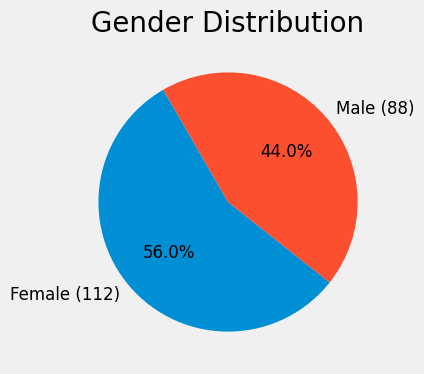

In [ ]:
gender_counts = df['Gender'].value_counts()

gender_labels = [f'{gender} ({count})' for gender, count in gender_counts.items()]

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=120, textprops={'fontsize': 12})
plt.title('Gender Distribution', fontsize=20)
plt.show()

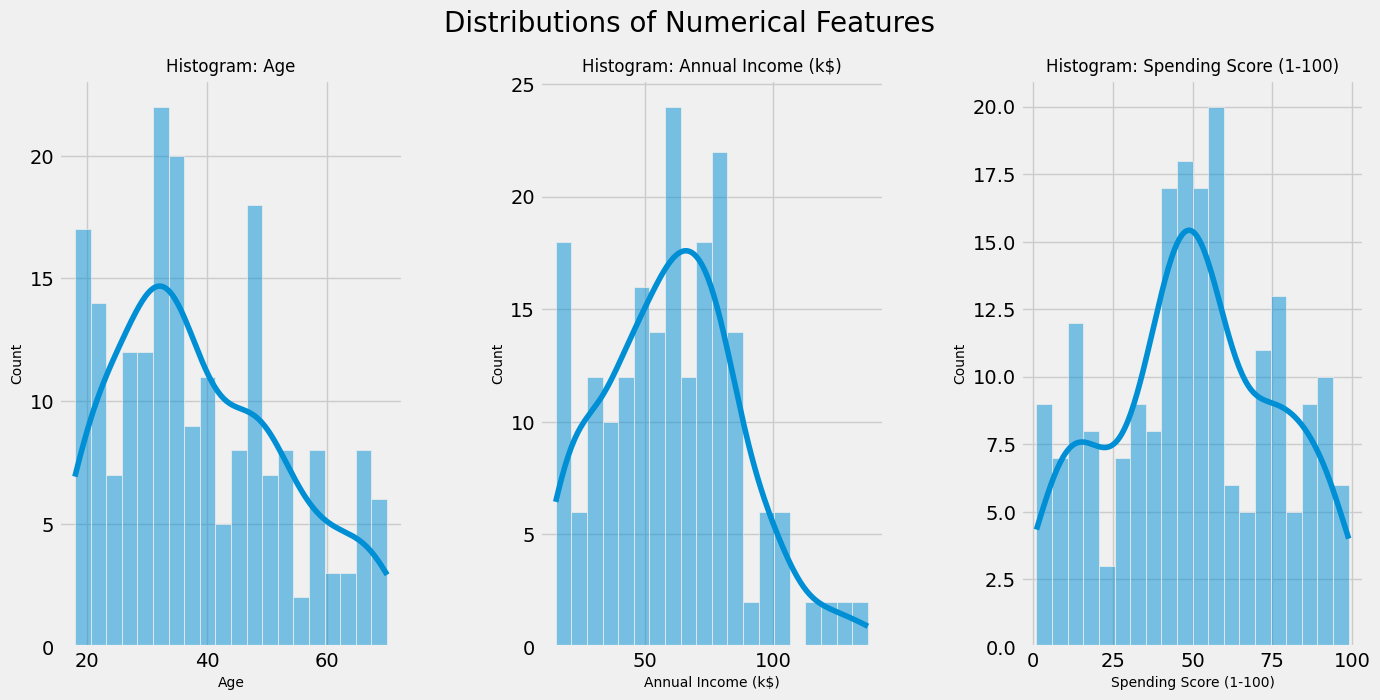

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle('Distributions of Numerical Features', fontsize=20)

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axs[i])
    axs[i].set_title("Histogram: "+feature, fontsize=12)
    axs[i].set_xlabel(feature, fontsize=10)
    axs[i].set_ylabel("Count", fontsize=10)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

- From the piechart we can conclude the **female customers** marginally **out run** male customers
- The distributions of **Age** and **Anunnal Income** are **positively skewed**.
- the distribution  of **Spending Score** has a **head and shoulder** type of distribution with the head been cenetred in the 40-60 range.

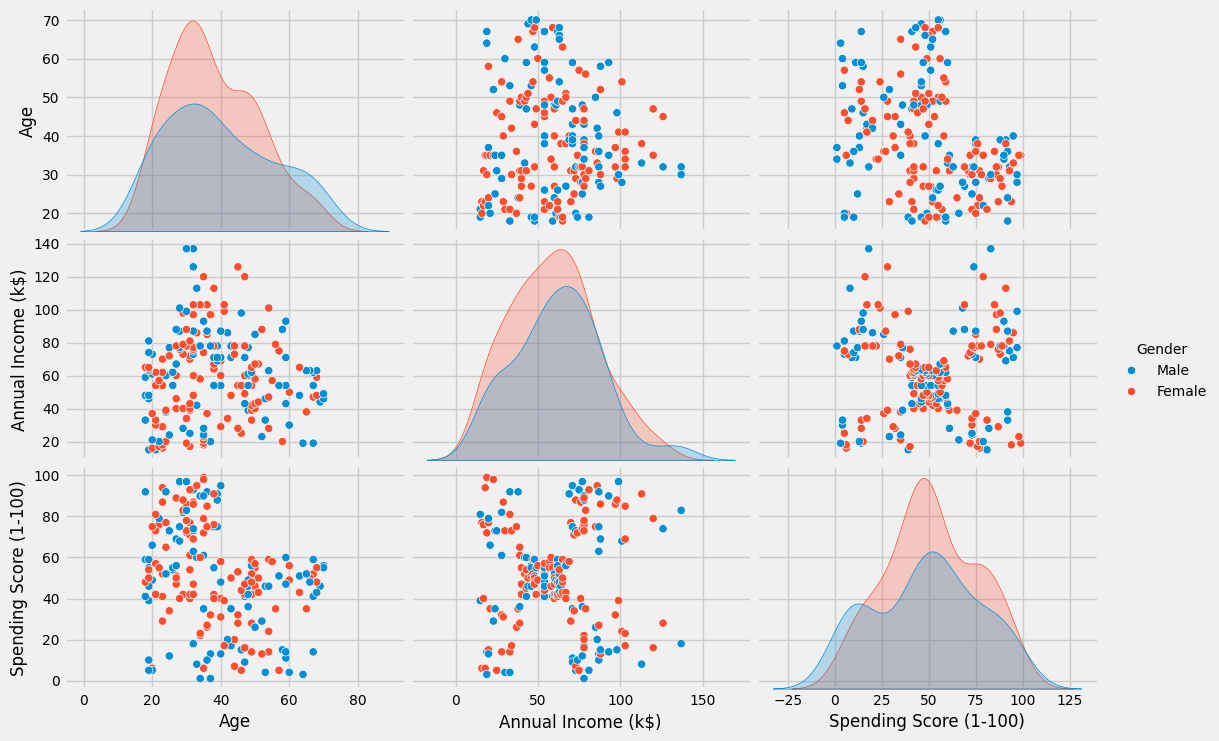

In [ ]:
plt.rcParams.update({'font.size': 10})
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

- From the above plot we see that **gender** has **no direct relation** with the other features. So, we can drop it and move on with other features.

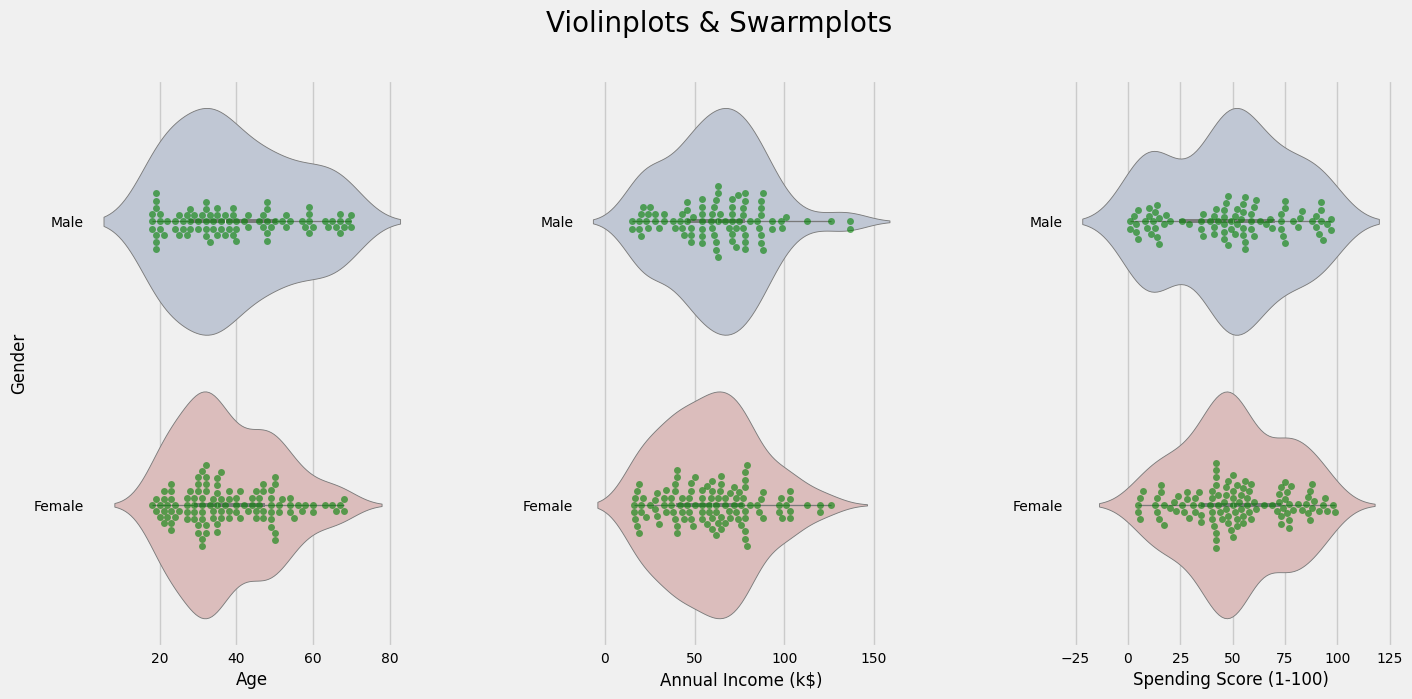

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Violinplots & Swarmplots', fontsize=20)
for i, cols in enumerate(numerical_features):
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag', ax=axs[i])
    sns.swarmplot(x=cols, y='Gender', data=df, color='g', alpha=0.6, ax=axs[i])
    axs[i].set_ylabel('Gender' if i == 0 else '', fontsize=12)

plt.show()

- The bulge around the age of **35** signifies the **median age** of the customers to be around 35.
- The median **Annual Income** for both the genders is roughly about **60 k\$**. Also the Annula Income of males **tapers very steeply** at the apex with some outliers as compared to females.
- Both the Genders display a strong buldge, especially female customers at the median value (50). **Male customers** display a **small but significant buldge** between 0 and 25.

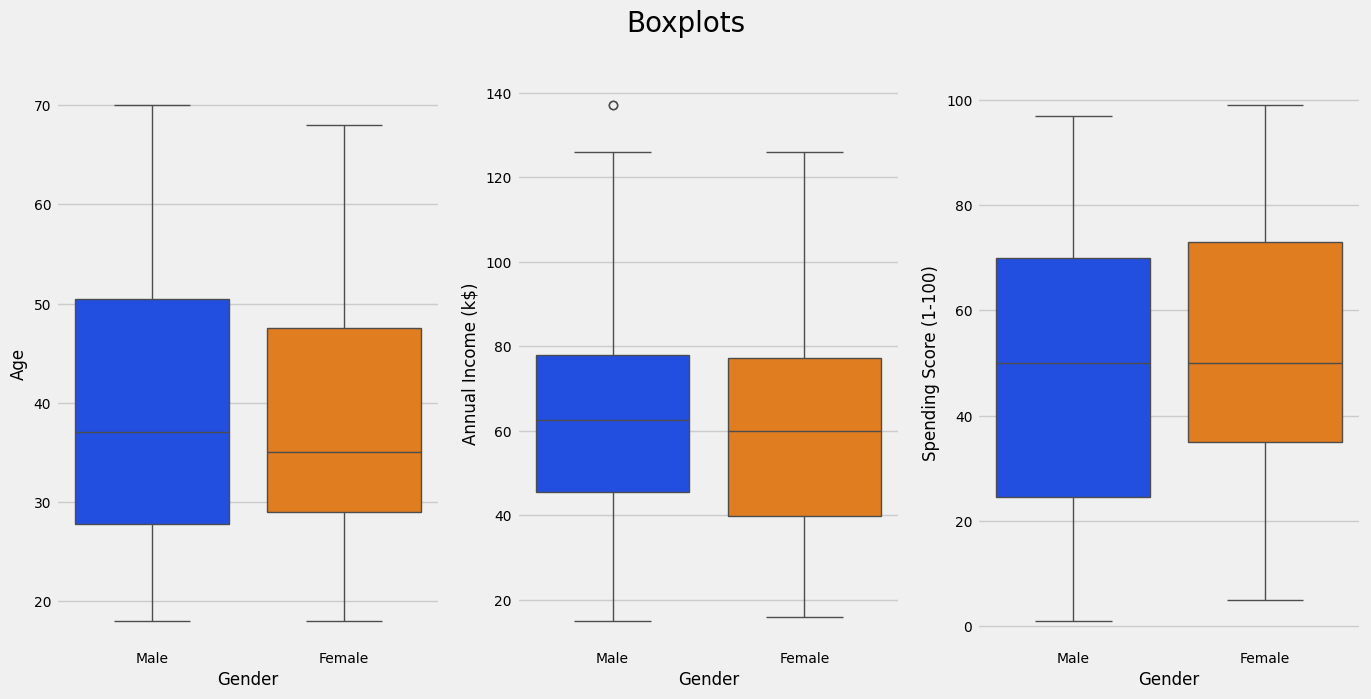

In [ ]:
fig, axs = plt.subplots(1, len(numerical_features), figsize=(15, 7), sharex=True)
fig.subplots_adjust(hspace=0.5)

fig.suptitle('Boxplots', fontsize=20)

bright_colors = sns.color_palette("bright", 2)

for i, col in enumerate(numerical_features):
    sns.boxplot(x='Gender', y=col, data=df, palette=bright_colors, ax=axs[i])
    axs[i].set_xlabel('Gender', fontsize=12)
    axs[i].set_ylabel(col, fontsize=12)

plt.show()

- **Age** range is almost the same for both genders and lies **between 30 and 50** however the range is slightly largest for male customers.
- The **Annual Income** of the female customers start roughly around 40 k\$ whereas that of **male customers** start **higher than 40 k\$**.
- **Female customers** have a slightly **better Spending Score** as compared to male coustomers but the average score is the same.

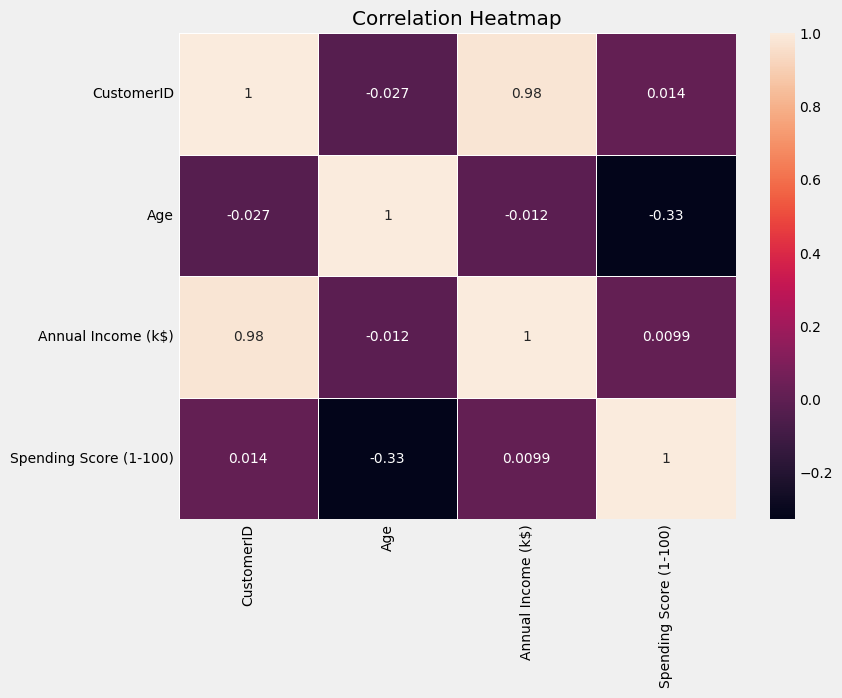

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Gender']).corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- **CustomerID** displays a very **high positive correlation** with **Annual Income**, we can conclude that the customers are arranged in ascending order according to their Annual Income. We are not going to include CustomerID for modeling purpose.
- **Spending Score** has a **negative correlation** with **Age** i.e, of one increases the other decreases. We can infer that youg people tend to have a good Spending Score than old people.
- Other features are barely correlated with each other.

## 4. Clustering Using K-means



- **K-means clustering** algorithm is an **Unsupervised Learning** method that classifies/groups the data into N clusters by randomly selecting N centeroids and then distance between the centroid and the data points is calculated.
- The data point is labelled with the centeroid with the least distance and vice a versa.
- For the N clusters, the average of the data points is taken for points maked with same centeroid and these are considered as the new centeroids.
- The process is repeated untill the centroids converge to fixed points.
- **N hyperparameter** : It is the number of clusters or groups the data is to be divided into. For the selection of values of N, we use 2 statistical tests :
  - **Elbow Method** : It is a method that plots the sum of squared error for a range of values of N. If this plot looks like an arm, then N the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
  - **Silhouette Score Method** : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the N value with highest score is selected for modeling.

- Defining functions as we are going to use the similar syntax quite a few times.

In [ ]:
def calculate_clustering_metrics(data, features, N):
    X = data[features]
    inertia = []
    silhouette = []

    for n in range(2, N+1):
        algorithm = KMeans(n_clusters=n,
                           init='k-means++',
                           n_init=10,
                           max_iter=300,
                           tol=0.0001,
                           random_state=111,
                           algorithm='elkan')
        algorithm.fit(X)
        inertia.append(algorithm.inertia_)

        if n > 1:
            cluster_labels = algorithm.labels_
            silhouette.append(silhouette_score(X, cluster_labels))

    return X, inertia, silhouette

In [ ]:
def plot_metrics(inertia, silhouette):
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))

  axs[0].plot(np.arange(2, 11), inertia, '-', alpha=0.5)
  axs[0].plot(np.arange(2, 11), inertia, 'o', alpha=0.8)
  axs[0].set_xlabel('Number of Clusters')
  axs[0].set_ylabel('Inertia')
  axs[0].set_title('Elbow Method')

  axs[1].plot(np.arange(2, 11), silhouette, '-', alpha=0.5)
  axs[1].plot(np.arange(2, 11), silhouette, 'o', alpha=0.8)
  axs[1].set_xlabel('Number of Clusters')
  axs[1].set_ylabel('Average Silhouette Score')
  axs[1].set_title('Silhouette Score Method')

  plt.show()

In [ ]:
def create_model(X, N):
  algorithm = KMeans(n_clusters=N,
                           init='k-means++',
                           n_init=10,
                           max_iter=300,
                           tol=0.0001,
                           random_state=111,
                           algorithm='elkan')
  algorithm.fit(X)
  labels = algorithm.labels_
  centroids = algorithm.cluster_centers_

  return algorithm, labels, centroids

#### 4.1 Considering Age and Spending Score for segmentation

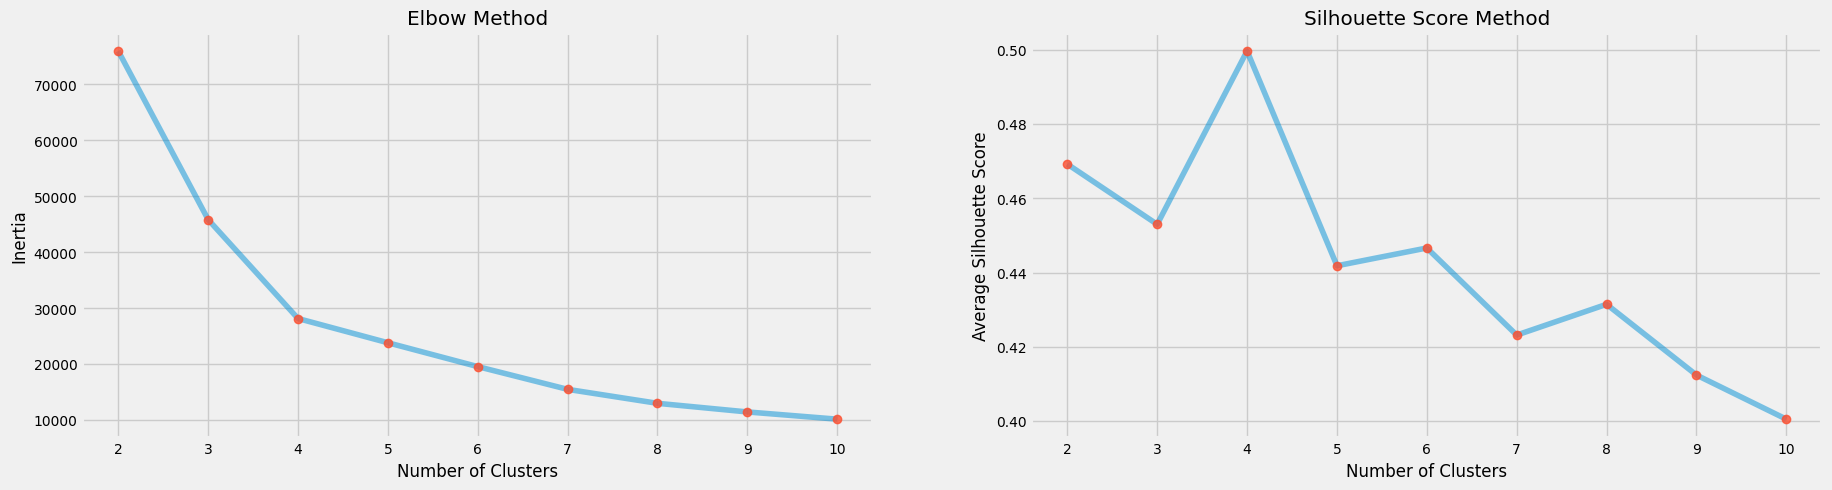

In [ ]:
X1, inertia1, silhouette1 = calculate_clustering_metrics(df, ['Age', 'Spending Score (1-100)'], 10)
plot_metrics(inertia1, silhouette1)

- From the above two graphs we can select the number of clusters to be **N = 4**.

In [ ]:
algorithm1, labels1, centroids1 = create_model(X1, 4)

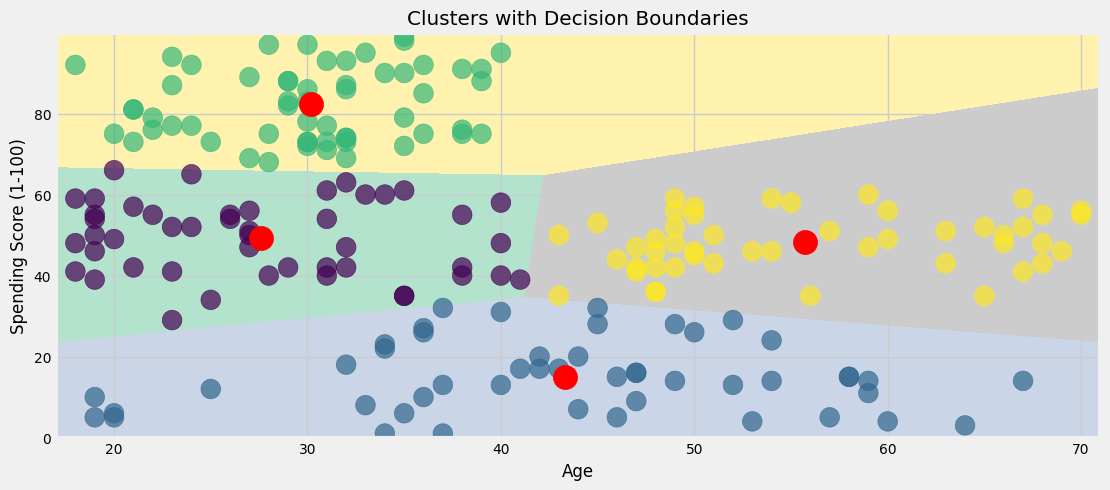

In [ ]:
h = 0.02
x_min, x_max = X1.values[:, 0].min() - 1, X1.values[:, 0].max() + 1
y_min, y_max = X1.values[:, 1].min() - 1, X1.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm1.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(12, 5))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, alpha=0.7, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=1)
plt.title('Clusters with Decision Boundaries')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

#### 4.2 Considering Annual Income and Spending Score for segmentation

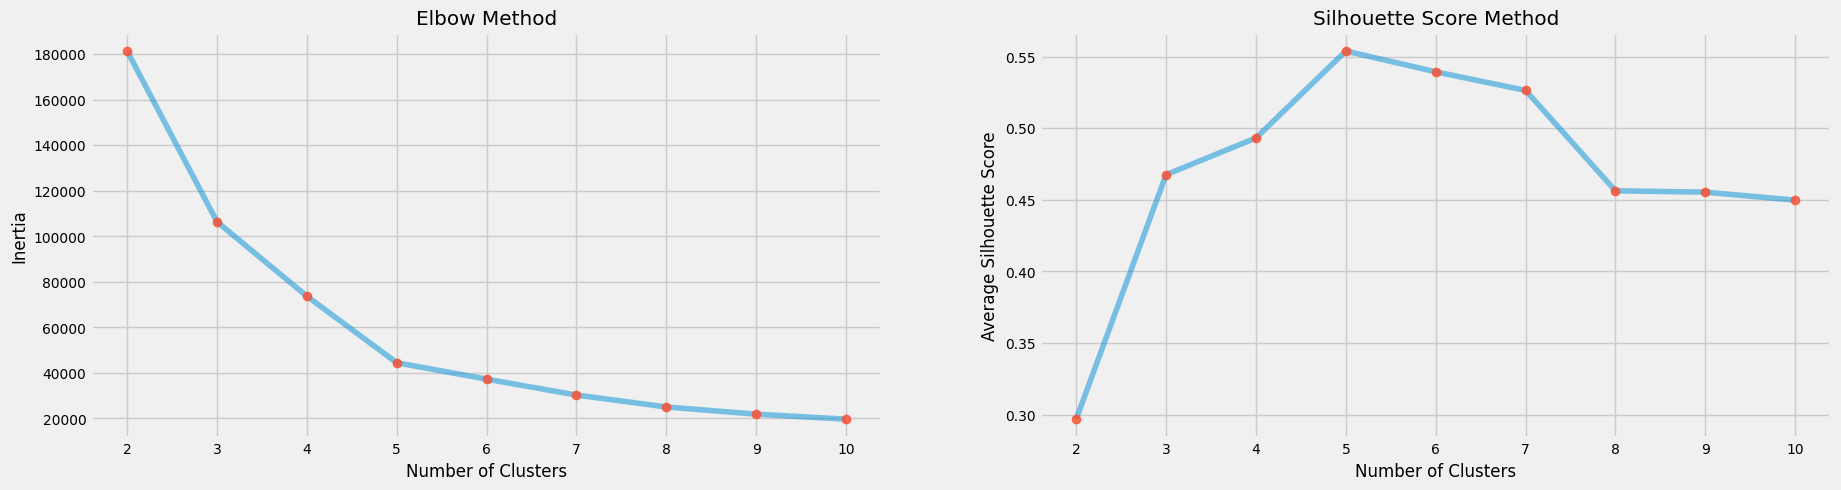

In [ ]:
X2, inertia2, silhouette2 = calculate_clustering_metrics(df, ['Annual Income (k$)', 'Spending Score (1-100)'], 10)
plot_metrics(inertia2, silhouette2)

- From the above two graphs we can select the number of clusters to be **N = 5**.

In [ ]:
algorithm2, labels2, centroids2 = create_model(X2, 5)

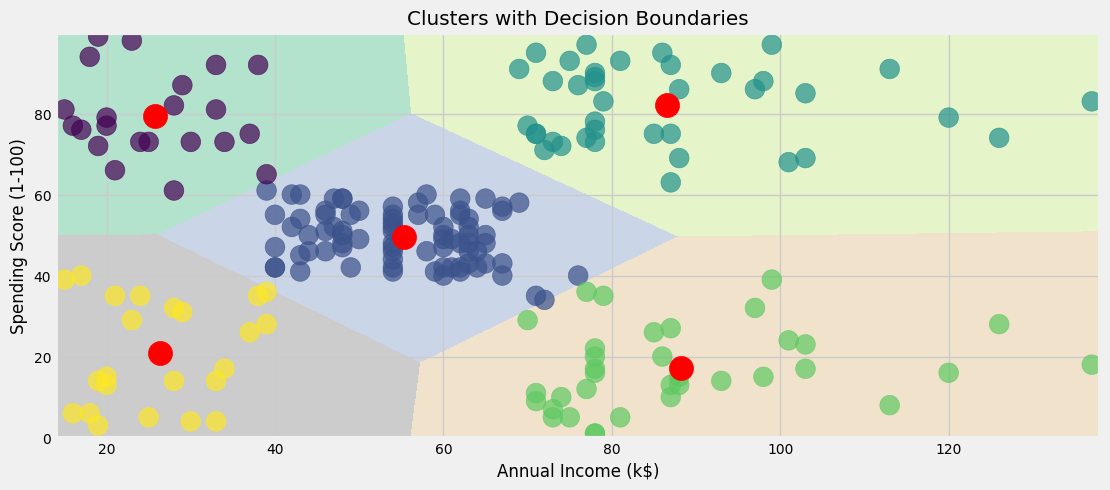

In [ ]:
h = 0.02
x_min, x_max = X2.values[:, 0].min() - 1, X2.values[:, 0].max() + 1
y_min, y_max = X2.values[:, 1].min() - 1, X2.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm2.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(12, 5))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, alpha=0.7, s=200)
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1], s=300, c='red', alpha=1)
plt.title('Clusters with Decision Boundaries')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

#### 4.3 Considering Age and Annual Income for segmentation

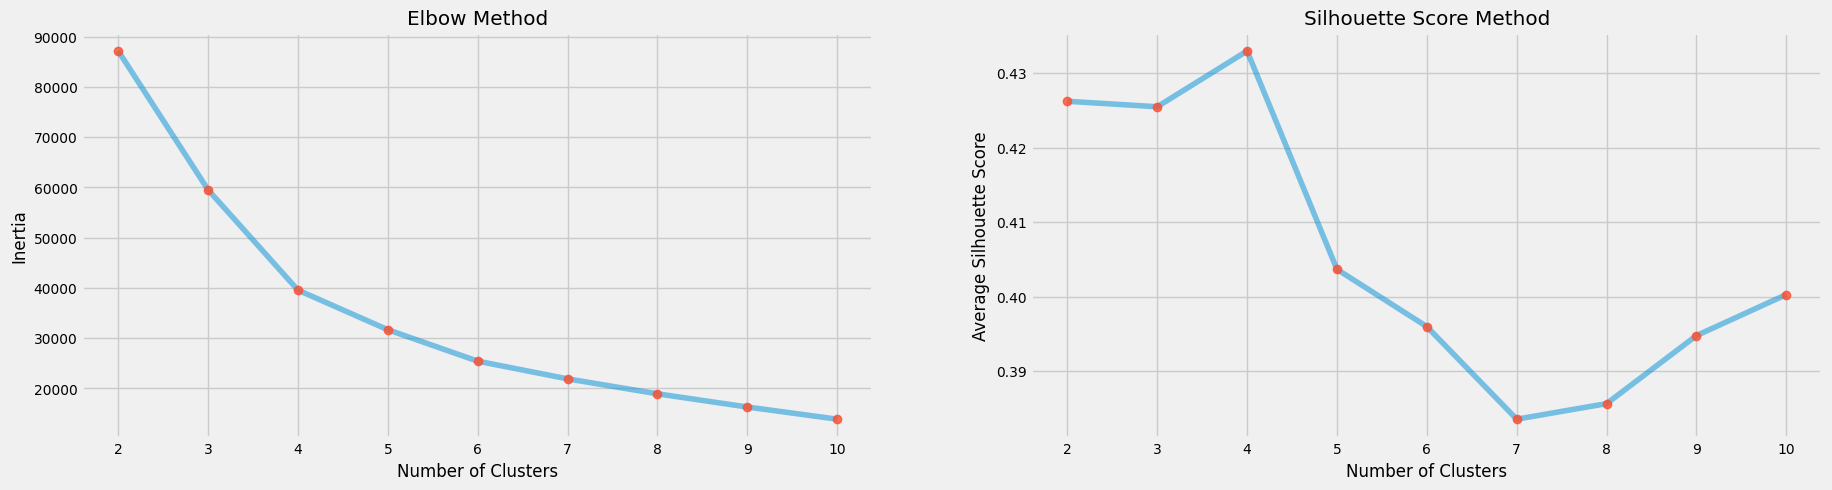

In [ ]:
X3, inertia3, silhouette3 = calculate_clustering_metrics(df, ['Age', 'Annual Income (k$)'], 10)
plot_metrics(inertia3, silhouette3)

- From the above two graphs we can select the number of clusters to be **N = 4**.

In [ ]:
algorithm3, labels3, centroids3 = create_model(X3, 4)

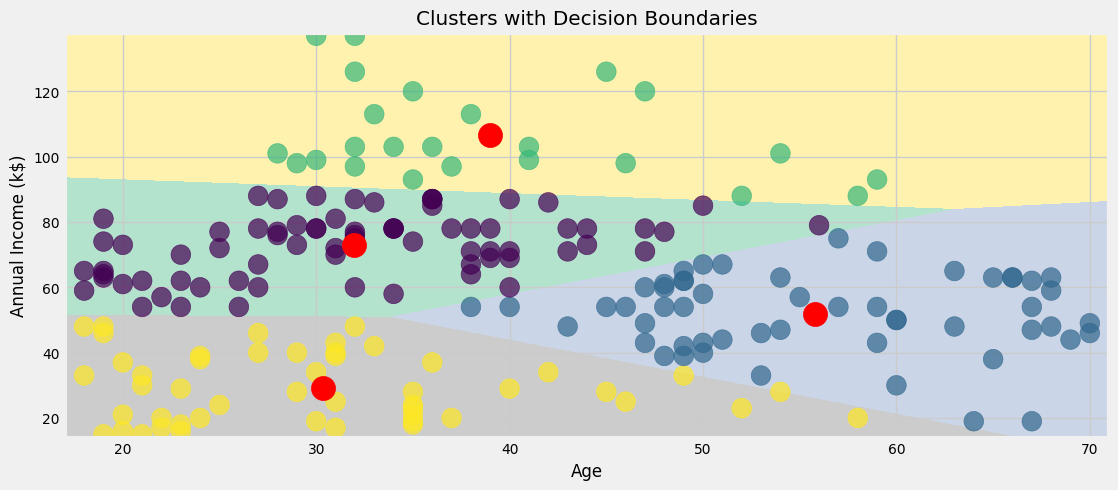

In [ ]:
h = 0.02
x_min, x_max = X3.values[:, 0].min() - 1, X3.values[:, 0].max() + 1
y_min, y_max = X3.values[:, 1].min() - 1, X3.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm3.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(12, 5))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Annual Income (k$)', data=df, c=labels3, alpha=0.7, s=200)
plt.scatter(x=centroids3[:, 0], y=centroids3[:, 1], s=300, c='red', alpha=1)
plt.title('Clusters with Decision Boundaries')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.show()

#### 4.4/ Considering Age, Annual Income and Spending Score for segmentation

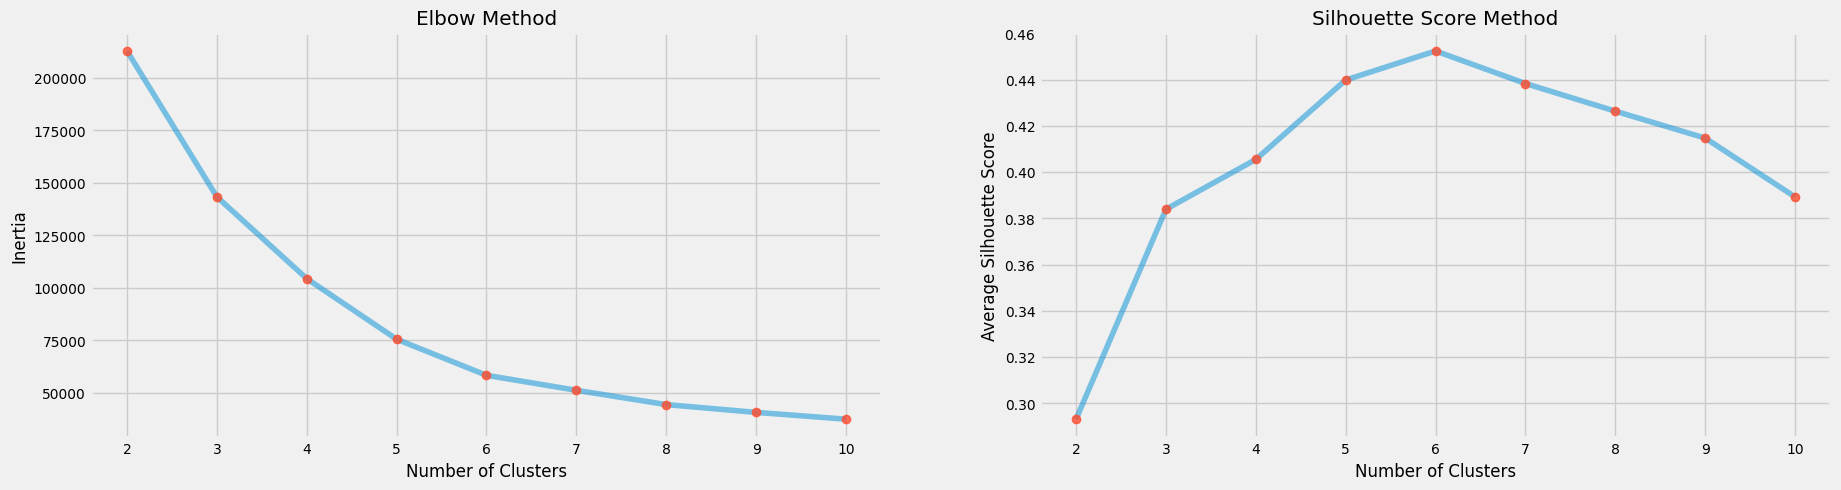

In [ ]:
X4, inertia4, silhouette4 = calculate_clustering_metrics(df, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 10)
plot_metrics(inertia4, silhouette4)

- From the above two graphs we can select the number of clusters to be **N = 6**.

In [ ]:
algorithm4, labels4, centroids4 = create_model(X4, 6)

In [ ]:
df['label4'] =  labels4
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label4'],
        size= 10,
        line=dict(
            color= df['label4'],
            width= 100
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(title= 'Clusters',
                   scene = dict(xaxis = dict(title  = 'Age'),
                                yaxis = dict(title  = 'Spending Score'),
                                zaxis = dict(title  = 'Annual Income')
                                )
                   )
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 5. Results Table

| Sr. No. | Feature Combination                           | Number of Clusters |
|---------|-----------------------------------------------|--------------------|
| 1.      | Age and Spending Score (1-100)                | 4                  |
| 2.      | Annual Income (k\$) and Spending Score (1-100)| 5                  |
| 3.      | Age and Annual Income (k\$)                   | 4                  |
| 4.      | Age, Annual Income (k$) and Spending Score (1-100) | 6             |